In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

In [71]:
df=pd.read_csv('cardekho_dataset.csv')

In [72]:
df.shape

(15411, 14)

# Data Cleaning

In [73]:
##check features with null values
df.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [74]:
##Handling Duplicates
df.duplicated().sum()

0

# Feature Engineering

In [75]:
df.loc[df['brand']=='Maruti']

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
5,5,Maruti Wagon R,Maruti,Wagon R,8,35000,Individual,Petrol,Manual,18.90,998,67.10,5,350000
7,7,Maruti Wagon R,Maruti,Wagon R,3,17512,Dealer,Petrol,Manual,20.51,998,67.04,5,410000
9,12,Maruti Swift,Maruti,Swift,4,28321,Dealer,Petrol,Manual,16.60,1197,85.00,5,511000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15398,19528,Maruti Alto,Maruti,Alto,7,44000,Dealer,CNG,Manual,30.46,796,47.30,5,275000
15400,19530,Maruti Alto,Maruti,Alto,4,12706,Dealer,Petrol,Manual,24.70,796,47.30,5,313000
15401,19531,Maruti Swift,Maruti,Swift,3,25000,Individual,Petrol,Automatic,22.00,1197,81.80,5,590000
15404,19535,Maruti Ertiga,Maruti,Ertiga,5,56829,Dealer,Diesel,Manual,20.77,1248,88.80,7,895000


In [76]:
df.drop(['brand','model','Unnamed: 0'],axis=1,inplace=True)

In [77]:
df

,car_name,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...
15406,Hyundai i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,Maruti Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,Skoda Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,Mahindra XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [78]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 7


In [79]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 4


In [80]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 2


In [81]:

continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 5


# Multicollinearity Check

Correlation Heatmap

In [82]:
df.corr(numeric_only=True)

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


# Variance Inflation Factor (VIF)
Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [83]:
import statsmodels.api as sm
num_features=df.select_dtypes(exclude='object').columns
for i in range(0,len(num_features)-1):
    x=df.loc[:,df.columns==num_features[i]]
    y=df.selling_price
    model=sm.OLS(x,y)
    results=model.fit()
    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print('Variance inflation factor of {} column is {} \n'.format(num_features[i],vif))

Variance inflation factor of vehicle_age column is 1.34 

Variance inflation factor of km_driven column is 1.24 

Variance inflation factor of mileage column is 1.54 

Variance inflation factor of engine column is 2.41 

Variance inflation factor of max_power column is 3.13 

Variance inflation factor of seats column is 1.77 



# Check Outlier and Capping it

In [84]:
df.columns

Index(['car_name', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type',
       'transmission_type', 'mileage', 'engine', 'max_power', 'seats',
       'selling_price'],
      dtype='object')

<Axes: ylabel='km_driven'>

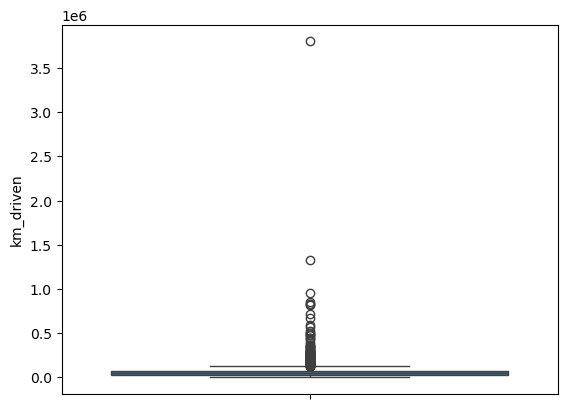

In [85]:
sns.boxplot(df['km_driven'])

<Axes: ylabel='mileage'>

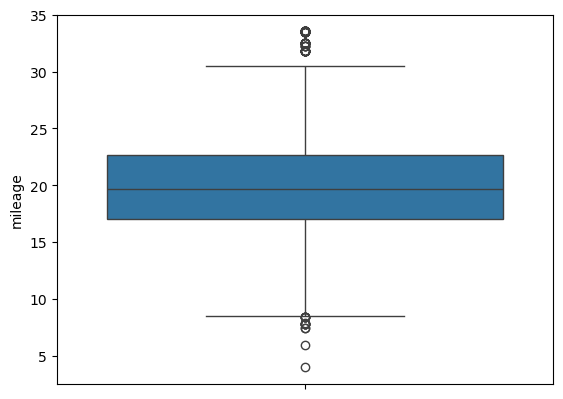

In [86]:
sns.boxplot(df['mileage'])

<Axes: ylabel='engine'>

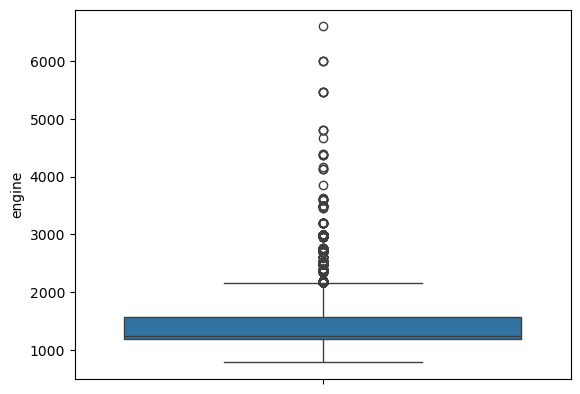

In [87]:
sns.boxplot(df['engine'])

# Detecting Outlier and Capping it


In [88]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

In [89]:
for i in continuous_features:
    detect_outliers(i)


 #### km_driven ####
percentile25 30000.0
percentile75 70000.0
Upper limit 130000.0
Lower limit -30000.0

 #### mileage ####
percentile25 17.0
percentile75 22.7
Upper limit 31.25
Lower limit 8.450000000000001

 #### engine ####
percentile25 1197.0
percentile75 1582.0
Upper limit 2159.5
Lower limit 619.5

 #### max_power ####
percentile25 74.0
percentile75 117.3
Upper limit 182.25
Lower limit 9.050000000000011

 #### selling_price ####
percentile25 385000.0
percentile75 825000.0
Upper limit 1485000.0
Lower limit -275000.0


# Checking Skewnessr after outlier Caping

In [90]:
df[continuous_features].skew(axis=0,skipna=True)

km_driven        0.617437
mileage          0.067940
engine           0.684096
max_power        1.067229
selling_price    0.968836
dtype: float64

# Feature Transformation

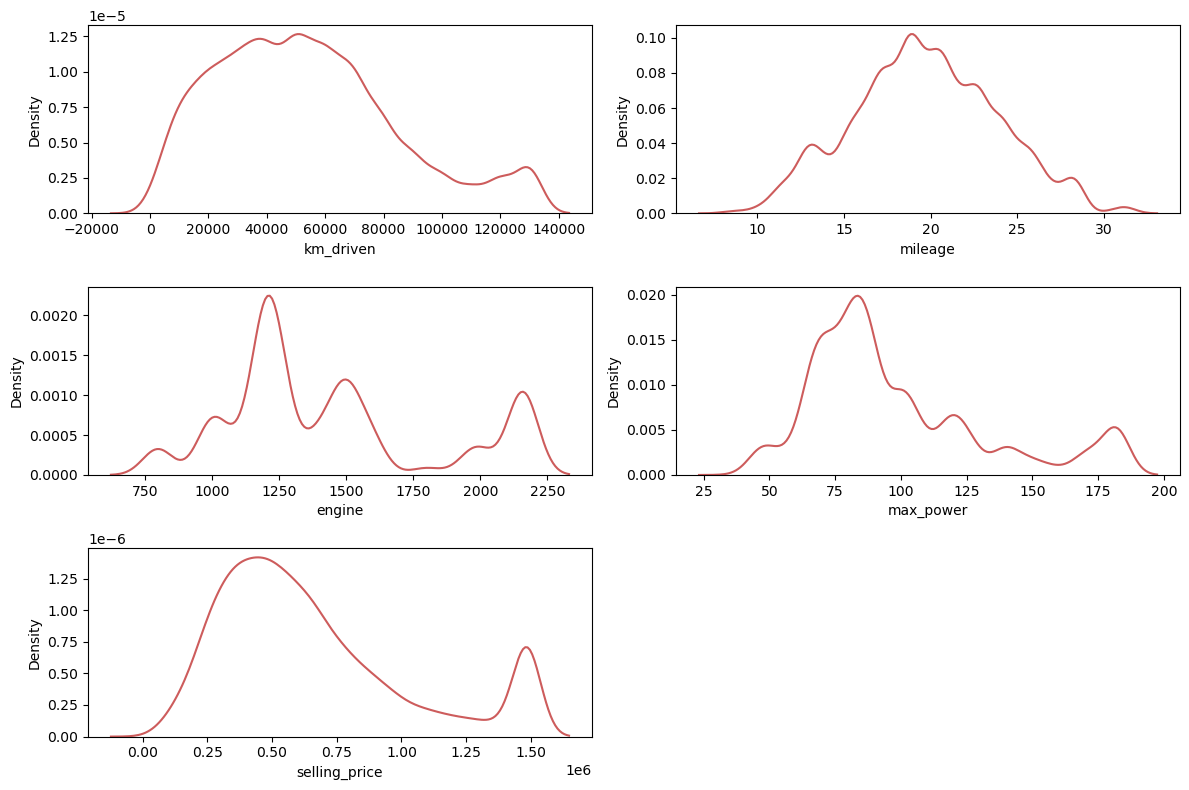

In [91]:
# distribution of data before scaling
plt.figure(figsize=(12, 8))
for i, col in enumerate(['km_driven', 'mileage', 'engine', 'max_power', 'selling_price']):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=df[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

# Split X and Y 

In [92]:
from sklearn.model_selection import train_test_split
X=df.drop(['selling_price'],axis=1)
y=df[['selling_price']]

In [93]:
X.to_csv('features_selection.csv',index=False)
y.to_csv('label_selection.csv',index=False)

# -------------------------------------- split from here--------------------------------------

# Feature Encoding and Scaling

In [94]:
X = pd.read_csv('features_selection.csv')
y = pd.read_csv('label_selection.csv')

In [95]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [96]:
import category_encoders as ce

In [97]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['seller_type','fuel_type','transmission_type']
binary_columns = ['car_name']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders.binary import BinaryEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
binary_transformer = BinaryEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
         ("StandardScaler", numeric_transformer, num_features),
        ("BinaryEncoder", binary_transformer, binary_columns)
        
    ]
)

In [98]:
X= preprocessor.fit_transform(X)

In [99]:
#X=pd.DataFrame(X,index=X.columns)

In [100]:
#X

In [101]:
#X

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((12328, 23), (3083, 23))

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [104]:
#rf=RandomForestRegressor(n_estimators=100,max_depth=5)
#rf.fit(X_train,y_train)

In [105]:
#y_pred=rf.predict(X_test)

In [106]:
#mse=mean_squared_error(y_test,y_pred)
##mape=mean_absolute_percentage_error(y_test,y_pred)
#print(mape*100)
#print(mse)

In [107]:
#rr=RandomForestRegressor(n_estimators=100,max_depth=2)
#rr.fit(X_train,y_train)
##y_pred=rr.predict(X_test)
#mse=mean_squared_error(y_test,y_pred)
#mape=mean_absolute_percentage_error(y_test,y_pred)
#print(mape*100)
#print(mse)

In [108]:
pip install xgboost

In [109]:
from xgboost import XGBRegressor

In [110]:
#xg=XGBRegressor(max_depth=3,n_estimator=100)
#xg.fit(X_train,y_train)
#y_train_pred=xg.predict(X_train)
##mape=mean_absolute_percentage_error(y_train,y_train_pred)
#print(mape*100)

In [111]:
#X_train.to_csv('features_selection.csv',index=False)
#y_train.to_csv('label_selection.csv',index=False)


# Model Selection

In [112]:
#pip install catboost


In [113]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [115]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create a Function to Evaluate Model

In [116]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [118]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    #"CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    'Gradient Boost Regressor': GradientBoostingRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
    
    
#     pickle the file to model.pkl file... give variable model into it



#  load pickle file and assign it variable model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae ,model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 148767.4017
- Mean Absolute Error: 112822.8151
- R2 Score: 0.8380
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 155478.8345
- Mean Absolute Error: 118417.1508
- R2 Score: 0.8343


Lasso
Model performance for Training set
- Root Mean Squared Error: 148767.4172
- Mean Absolute Error: 112822.8031
- R2 Score: 0.8380
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 155479.5196
- Mean Absolute Error: 118418.6806
- R2 Score: 0.8343


Ridge
Model performance for Training set
- Root Mean Squared Error: 148770.8205
- Mean Absolute Error: 112835.0850
- R2 Score: 0.8380
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 155485.9482
- Mean Absolute Error: 118436.6096
- R2 Score: 0.8343


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 81848.1739
- Mean A

In [119]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=True)

,Model Name,R2_Score
7,AdaBoost Regressor,0.793214
2,Ridge,0.834318
1,Lasso,0.834332
0,Linear Regression,0.834333
4,Decision Tree,0.893238
8,Gradient Boost Regressor,0.918595
3,K-Neighbors Regressor,0.927506
5,Random Forest Regressor,0.932518
6,XGBRegressor,0.940491


# Here we can use Random Forest , XGBoost Regressor, CatBoost Regressor and K-Neighbours Regressor for Hyper Parameter Tuning

In [120]:
#Initialize few parameter for Hyperparamter tuning
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

gb_params = {"learning_rate": [0.1, 0.01, 0.06, 0.05],
              "max_depth": [6, 8, 12, 20, 30]}

In [121]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params),
                   ('XGBoost', XGBRegressor(), xgboost_params),
                   ('Gradient Boost', GradientBoostingRegressor(verbose=False), gb_params)
                   ]

In [123]:

from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=5,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
---------------- Best Params for KNN -------------------
{'n_neighbors': 10}
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 15, 'max_features': 8, 'max_depth': 15}
---------------- Best Params for XGBoost -------------------
{'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
---------------- Best Params for Gradient Boost -------------------
{'max_depth': 6, 'learning_rate': 0.05}


In [125]:
models = {
    "Random Forest Regressor": RandomForestRegressor(**model_param['RF'], n_jobs=-1),
     "K-Neighbors Regressor": KNeighborsRegressor(**model_param['KNN'], n_jobs=-1),
    "XGBRegressor": XGBRegressor(**model_param['XGBoost'], n_jobs=-1), 
     "Gradient Boosting ": GradientBoostingRegressor(**model_param['Gradient Boost'],verbose=False)
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 74314.1650
- Mean Absolute Error: 52644.0028
- R2 Score: 0.9596
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 94446.0294
- Mean Absolute Error: 64798.5432
- R2 Score: 0.9389


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 90415.8584
- Mean Absolute Error: 61136.6402
- R2 Score: 0.9402
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 103777.9388
- Mean Absolute Error: 69776.1677
- R2 Score: 0.9262


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 53001.4095
- Mean Absolute Error: 38259.8220
- R2 Score: 0.9794
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 92741.2130
- Mean Absolute Error: 62990.6384
- R2 Score: 0.9411


Gradient Boosting 
Model performance for Training set
- Root Mean Squared Error: 8168

In [126]:
pd.DataFrame(list(zip(model_list, r2_list*100)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,XGBRegressor,0.941056
0,Random Forest Regressor,0.938869
3,Gradient Boosting,0.935916
1,K-Neighbors Regressor,0.926192


# Best Model is XGBoost Regressor with R2_Score of 94.10%